# Análise descritiva da RBEF

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd

import utils.sbf as sbf
import utils.scielo as scielo
from utils.plots import plt

In [5]:
sbf_vol = sbf.volumes_por_ano()
scielo_vol = scielo.volumes_por_ano()

In [6]:
sbf_artigos = {}
for ano, urls in sbf_vol.items():
    soma = 0
    for url in urls:
        soma += len(sbf.artigos_por_volume(url))
    sbf_artigos[ano] = soma

In [7]:
scielo_artigos = {}
for ano, urls in scielo_vol.items():
    soma = 0
    for url in urls:
        soma += len(scielo.artigos_por_volume(url, idioma='todos'))
    scielo_artigos[ano] = soma

In [8]:
scielo_artigos_pt = {}
for ano, urls in scielo_vol.items():
    soma = 0
    for url in urls:
        soma += len(scielo.artigos_por_volume(url))
    scielo_artigos_pt[ano] = soma

In [9]:
del scielo_artigos[2023]
del scielo_artigos_pt[2023]

In [10]:
total_artigos = scielo_artigos.copy()
total_artigos.update(sbf_artigos)

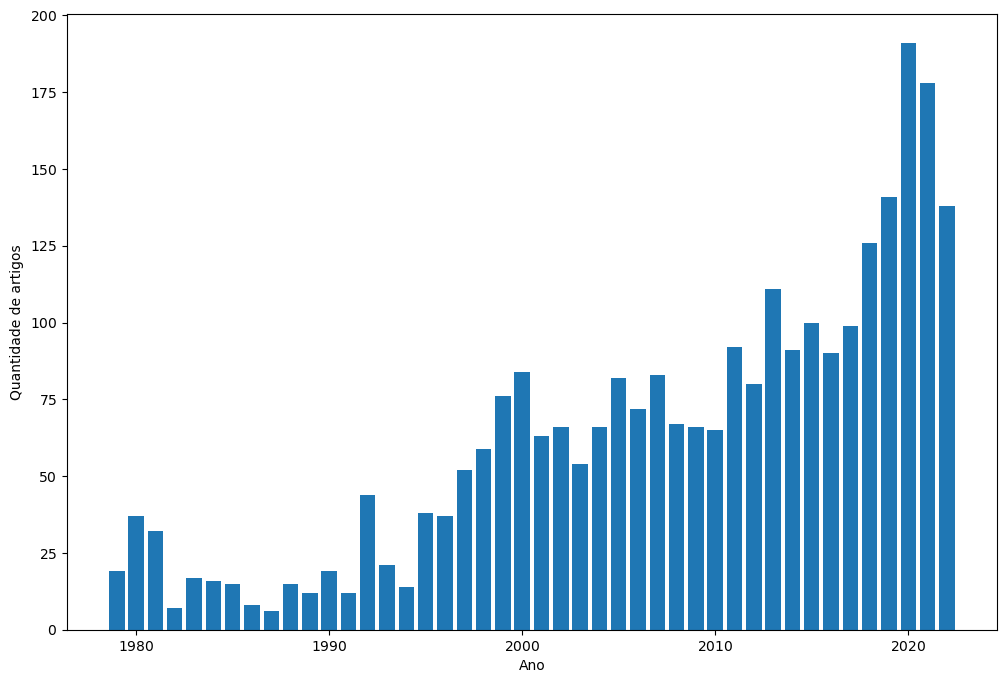

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(total_artigos.keys(), total_artigos.values())
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de artigos')
plt.show()

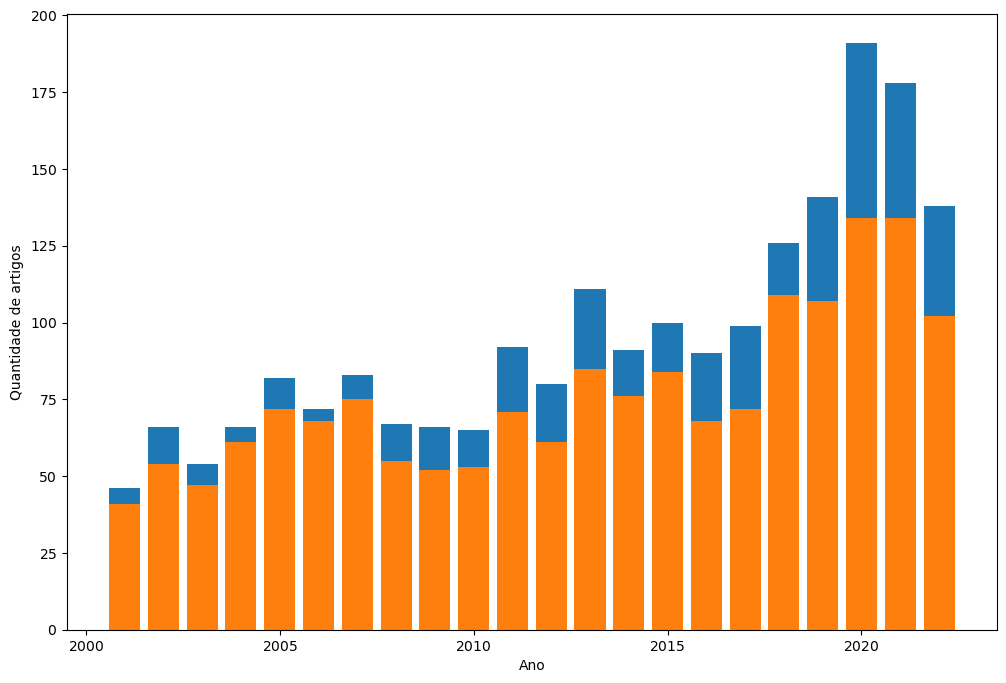

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(scielo_artigos.keys(), scielo_artigos.values())
ax.bar(scielo_artigos_pt.keys(), scielo_artigos_pt.values())
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de artigos')
plt.show()

In [24]:
 scielo_artigos[2001]

46

In [23]:
sum(sbf_artigos.values()) - scielo_artigos[2001]

657

In [20]:
sum(scielo_artigos.values())

2104

In [13]:
round(sum(scielo_artigos_pt.values())/sum(scielo_artigos.values())*100, 2)

79.9

In [14]:
sum(scielo_artigos_pt.values())

1681

In [15]:
df = pd.read_feather('scielo_dataset.feather')

In [16]:
round(len(df)/sum(scielo_artigos_pt.values())*100, 2)

98.99

In [17]:
round(len(df)/sum(scielo_artigos.values())*100, 2)

79.09

In [18]:
round(df['nova_seção'].value_counts(normalize=True)*100, 2)

nova_seção
artigos gerais                         48.50
pesquisa em ensino de física           14.18
produtos e materiais didáticos         12.14
história da física e ciências afins     9.31
outros                                  8.95
seções especiais                        5.95
SEM CATEGORIA                           0.96
Name: proportion, dtype: float64

In [ ]:
sbf